In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess the data.

In [3]:
data = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/14/Fraud_check.csv')

In [4]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
# Map taxable_income <= 30000 to 'Risky' and others to 'Good'
data['Taxable_Income'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')


In [6]:
# Drop the original 'Taxable.Income' column
data.drop('Taxable.Income', axis=1, inplace=True)

In [7]:
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [8]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)


In [9]:
data

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxable_Income_Risky
0,50047,10,0,0,1,1,0
1,134075,18,1,0,0,1,0
2,160205,30,0,1,0,1,0
3,193264,15,1,0,1,1,0
4,27533,28,0,1,0,0,0
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,0
596,55369,2,1,0,0,1,0
597,154058,0,0,0,0,1,0
598,180083,17,1,1,0,0,0


In [10]:
# Split the data into features (X) and the target variable (y)
X = data.drop('Taxable_Income_Risky', axis=1)
y = data['Taxable_Income_Risky']


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

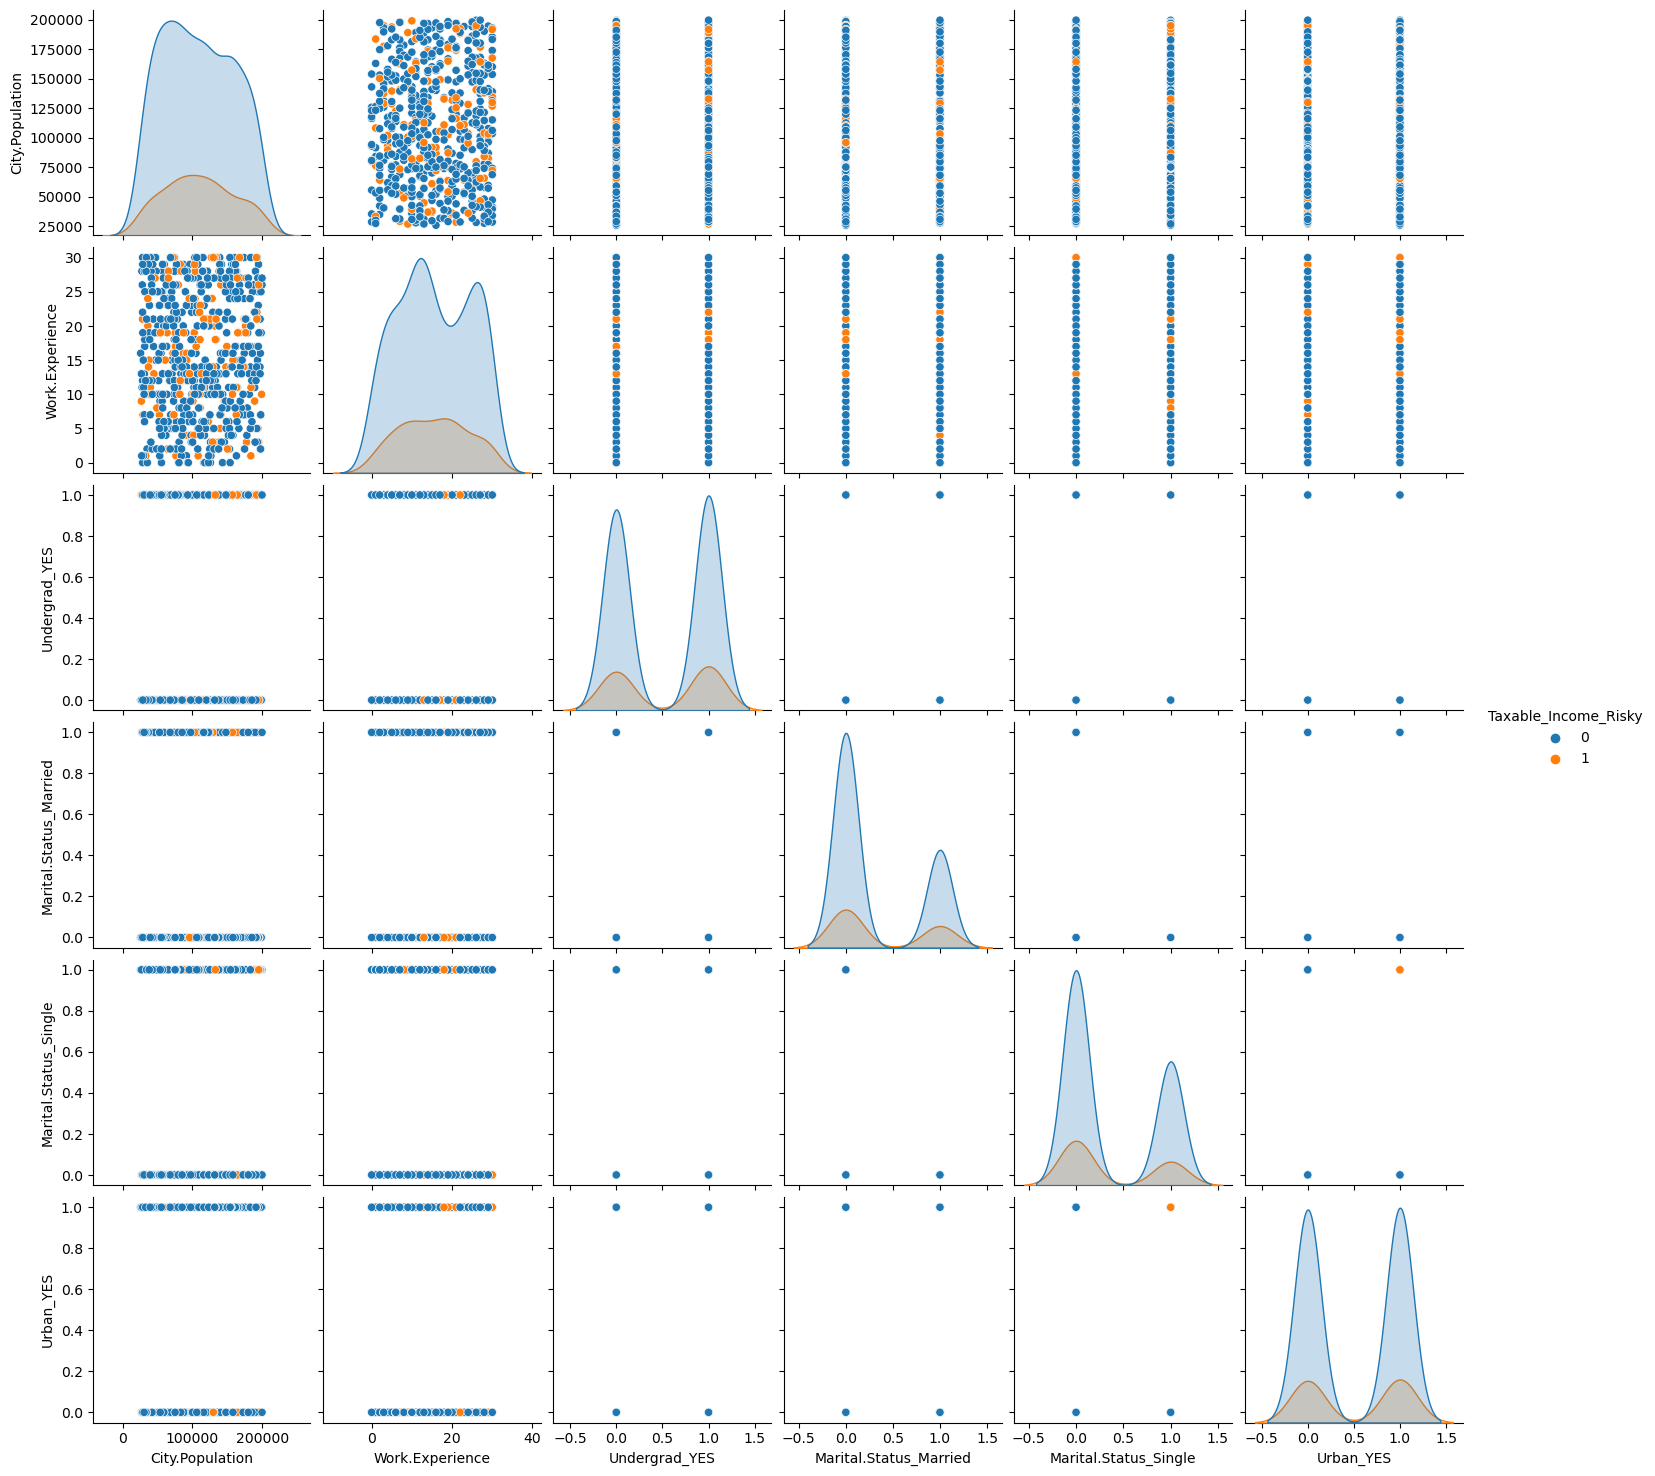

In [14]:
# pair plot to visualise the attributes all at once
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue='Taxable_Income_Risky', diag_kind='kde')
plt.show()

# Build and train the decision tree model.

In [15]:
# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Predict the target variable on the test set
y_pred = decision_tree.predict(X_test)

In [17]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        94
           1       0.18      0.15      0.17        26

    accuracy                           0.67       120
   macro avg       0.48      0.48      0.48       120
weighted avg       0.65      0.67      0.66       120



##### Precision: The precision for the "0" class (corresponding to "Good" category) is 0.78, which means that when the model predicts a data point as "Good," it is correct 78% of the time. However, the precision for the "1" class (corresponding to "Risky" category) is only 0.18, indicating that when the model predicts a data point as "Risky," it is correct only 18% of the time.

##### Recall: The recall for the "0" class is 0.81, suggesting that the model can correctly identify 81% of the "Good" data points. However, the recall for the "1" class is only 0.15, indicating that the model can only identify 15% of the "Risky" data points.

##### F1-score: The F1-score for the "0" class is 0.79, which is the harmonic mean of precision and recall for that class. The F1-score for the "1" class is 0.17.

##### The macro avg and weighted avg F1-scores are both around 0.48, which are relatively low, indicating poor performance overall.

# Hyperparameter Tuning using Grid Search

In [18]:
# Define the hyperparameter grid to search through
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                    # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                      # Minimum samples required at a leaf node
    'criterion': ['gini', 'entropy']                   # Splitting criterion
}


In [20]:
# Create the GridSearchCV object
from sklearn.model_selection import GridSearchCV

#grid search using 5-fold cross-validation
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [21]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [22]:
# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [23]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy with Best Model: {accuracy:.2f}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy with Best Model: 0.77


In [25]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        94
           1       0.00      0.00      0.00        26

    accuracy                           0.77       120
   macro avg       0.39      0.49      0.43       120
weighted avg       0.61      0.77      0.68       120



##### The hyperparameter tuning has improved the model's accuracy to 0.77.

# Validation of model's performance


In [26]:
# Further split the training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
# Make predictions on the validation set using the best model
y_val_pred = best_model.predict(X_val)

In [28]:
# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Validation Accuracy with Best Model: {val_accuracy:.2f}")


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Validation Accuracy with Best Model: 0.79


In [29]:
# Make predictions on the test set using the best model
y_test_pred = best_model.predict(X_test)

In [30]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with Best Model: {test_accuracy:.2f}")

# Print the classification report for the test set
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy with Best Model: 0.77
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        94
           1       0.00      0.00      0.00        26

    accuracy                           0.77       120
   macro avg       0.39      0.49      0.43       120
weighted avg       0.61      0.77      0.68       120



##### The validation accuracy with the best model is 0.79, and the test accuracy is 0.77

##### While the accuracy has increased, the model still struggles to correctly identify the "Risky" class.

# Data Balancing


### Oversampling: 

In [31]:
from imblearn.over_sampling import RandomOverSampler

# Create an oversampler object
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [32]:
# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

In [37]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [38]:
# Make predictions on the validation set using the best model
y_val_pred = best_model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Validation Accuracy with Best Model: {val_accuracy:.2f}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Validation Accuracy with Best Model: 0.65


In [39]:
# Make predictions on the test set using the best model
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with Best Model: {test_accuracy:.2f}")

# Print the classification report for the test set
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy with Best Model: 0.69
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        94
           1       0.30      0.31      0.30        26

    accuracy                           0.69       120
   macro avg       0.55      0.55      0.55       120
weighted avg       0.70      0.69      0.69       120



##### The validation accuracy with the best model is approximately 0.65, and the test accuracy is approximately 0.69. The test set classification report shows that the model has better precision, recall, and F1-score for the "Risky" class compared to the previous versions

### SMOTE (Synthetic Minority Over-sampling Technique):

In [40]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [41]:
# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)


In [42]:
# Train the model on the resampled training data
decision_tree.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set
y_val_pred = decision_tree.predict(X_val)



In [43]:
# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Print the classification report for the validation set
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.51
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.60      0.65        73
           1       0.15      0.22      0.18        23

    accuracy                           0.51        96
   macro avg       0.43      0.41      0.41        96
weighted avg       0.57      0.51      0.54        96



In [44]:
# Make predictions on the test set
y_test_pred = decision_tree.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report for the test set
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.59
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72        94
           1       0.19      0.27      0.22        26

    accuracy                           0.59       120
   macro avg       0.48      0.48      0.47       120
weighted avg       0.65      0.59      0.61       120



##### The validation accuracy is approximately 0.51, and the test accuracy is approximately 0.59. The classification reports for both the validation and test sets show that the model's performance is better than before

##### but it still struggles to correctly classify instances from the "Risky" class.

In [45]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [46]:
# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [47]:
# Make predictions on the validation set using the best model
y_val_pred = best_model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Validation Accuracy with Best Model: {val_accuracy:.2f}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Validation Accuracy with Best Model: 0.48


In [48]:
# Make predictions on the test set using the best model
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with Best Model: {test_accuracy:.2f}")

# Print the classification report for the test set
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy with Best Model: 0.58
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.64      0.71        94
           1       0.23      0.38      0.29        26

    accuracy                           0.58       120
   macro avg       0.51      0.51      0.50       120
weighted avg       0.67      0.58      0.61       120



##### The validation accuracy with the best model is approximately 0.48, and the test accuracy is approximately 0.58. The classification report for the test set shows that the model has better precision, recall, and F1-score for the "Risky" class compared to previous versions 